# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv(r'C:\Users\NAMEERA\Desktop\BCG customer churn ML/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df= pd.read_csv(r'C:\Users\NAMEERA\Downloads\price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [6]:
diff.describe()


,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
count,16096.000000,16096.000000
mean,-0.004545,0.279544
std,0.012778,1.432820
min,-0.148477,-44.266931
25%,-0.008161,0.000004
50%,-0.005610,0.162916
75%,-0.003573,0.177779
max,0.168958,40.728885


In [7]:
diff.shape

(16096, 3)

In [8]:
type(diff)

pandas.core.frame.DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14605 non-null  int64         
 1   id                              14605 non-null  object        
 2   channel_sales                   14605 non-null  object        
 3   cons_12m                        14605 non-null  int64         
 4   cons_gas_12m                    14605 non-null  int64         
 5   cons_last_month                 14605 non-null  int64         
 6   date_activ                      14605 non-null  datetime64[ns]
 7   date_end                        14605 non-null  datetime64[ns]
 8   date_modif_prod                 14605 non-null  datetime64[ns]
 9   date_renewal                    14605 non-null  datetime64[ns]
 10  forecast_cons_12m               14605 non-null  float64       
 11  fo

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='offpeak_diff_dec_january_energy', ylabel='Density'>

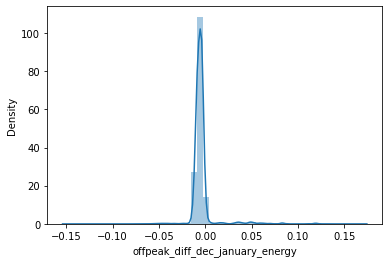

In [10]:
sns.distplot(diff['offpeak_diff_dec_january_energy'])

C:\Users\NAMEERA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='offpeak_diff_dec_january_power', ylabel='Density'>

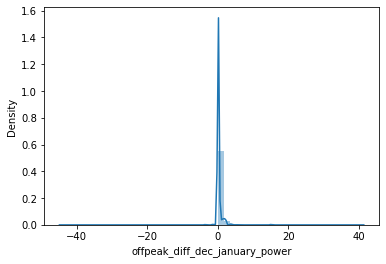

In [11]:
sns.distplot(diff['offpeak_diff_dec_january_power'])

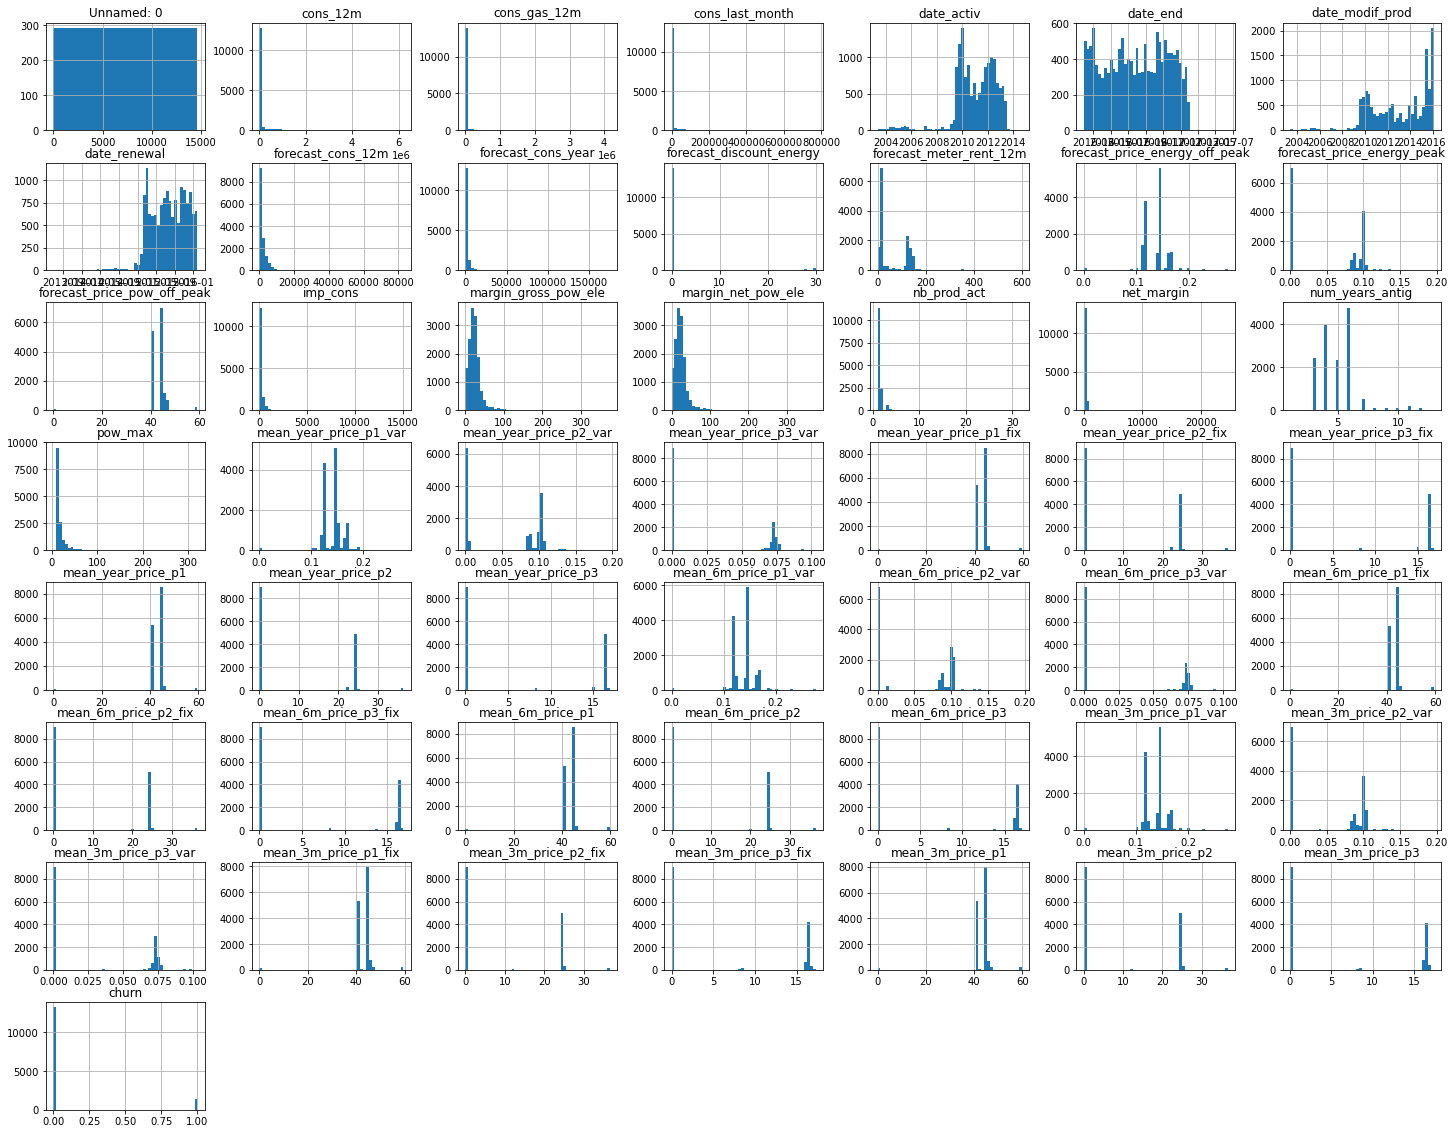

In [12]:
df.hist(figsize=(25,20),bins=50)
plt.show()

In [13]:
churn = df[['id','churn']]

In [14]:
diff_churn=pd.merge(diff,churn,on='id')
diff_churn.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,churn
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,0


In [15]:
correlation = diff_churn.corr()

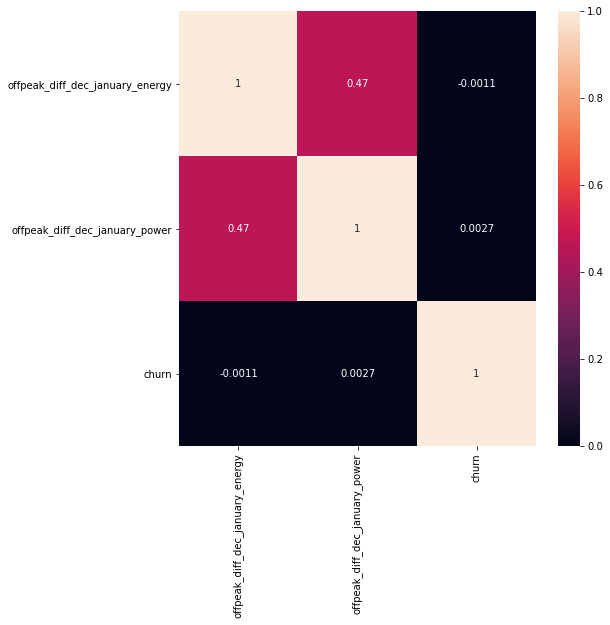

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot = True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

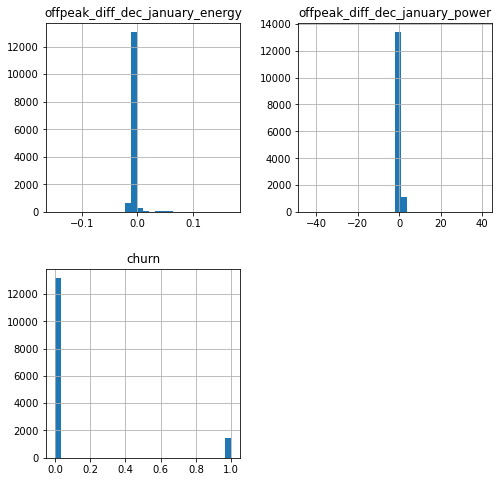

In [17]:
diff_churn.hist(figsize=(8,8),bins=30)
plt.show()

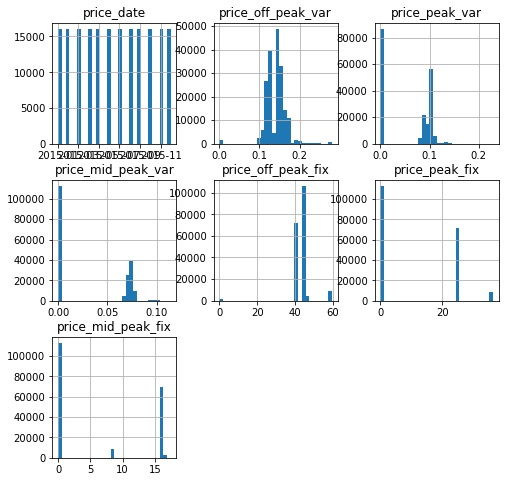

In [18]:
price_df.hist(figsize=(8,8),bins=30)
plt.show()

In [19]:
#Encoding categorical data
#Use .get_dummies() method to deal with categorical data that has more than 2 unique values
identity = diff_churn['id']
diff_churn = diff_churn.drop(columns='id')

In [20]:
#convert rest of the categorical variable into dummies
diff_churn = pd.get_dummies(diff_churn)

In [21]:
#rejoin the client ID to the dataset
diff_churn = pd.concat([diff_churn, identity], axis = 1)

In [22]:
#split the dataset for train and test data 
X_data= diff_churn.drop(columns='churn')
y_data = diff_churn['churn']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=21,stratify=y_data)

In [25]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (10953, 3)
y_train shape: (10953,)


In [26]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (3652, 3)
y_test shape: (3652,)


In [27]:
#Separate client ID from train and test dataset
#this is done because the client ids are a set of strings in each sample
train_identity = X_train['id']
X_train = X_train.drop(columns = ['id'])
test_identity = X_test['id']
X_test = X_test.drop(columns = ['id'])

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#feature scaling to normalize the independent features 
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [30]:
X_train

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
13116,0.033284,-0.084751
14241,-0.415111,-0.096064
12244,-0.053188,-0.220063
11734,-0.158012,-0.220060
1767,-0.013507,-0.084751
...,...,...
2488,-0.415111,-0.096066
7573,0.261614,-0.084751
1777,-0.084850,-0.084751
7339,-0.234480,-0.220063


array([[<AxesSubplot:xlabel='offpeak_diff_dec_january_energy', ylabel='offpeak_diff_dec_january_energy'>,
        <AxesSubplot:xlabel='offpeak_diff_dec_january_power', ylabel='offpeak_diff_dec_january_energy'>],
       [<AxesSubplot:xlabel='offpeak_diff_dec_january_energy', ylabel='offpeak_diff_dec_january_power'>,
        <AxesSubplot:xlabel='offpeak_diff_dec_january_power', ylabel='offpeak_diff_dec_january_power'>]],
      dtype=object)

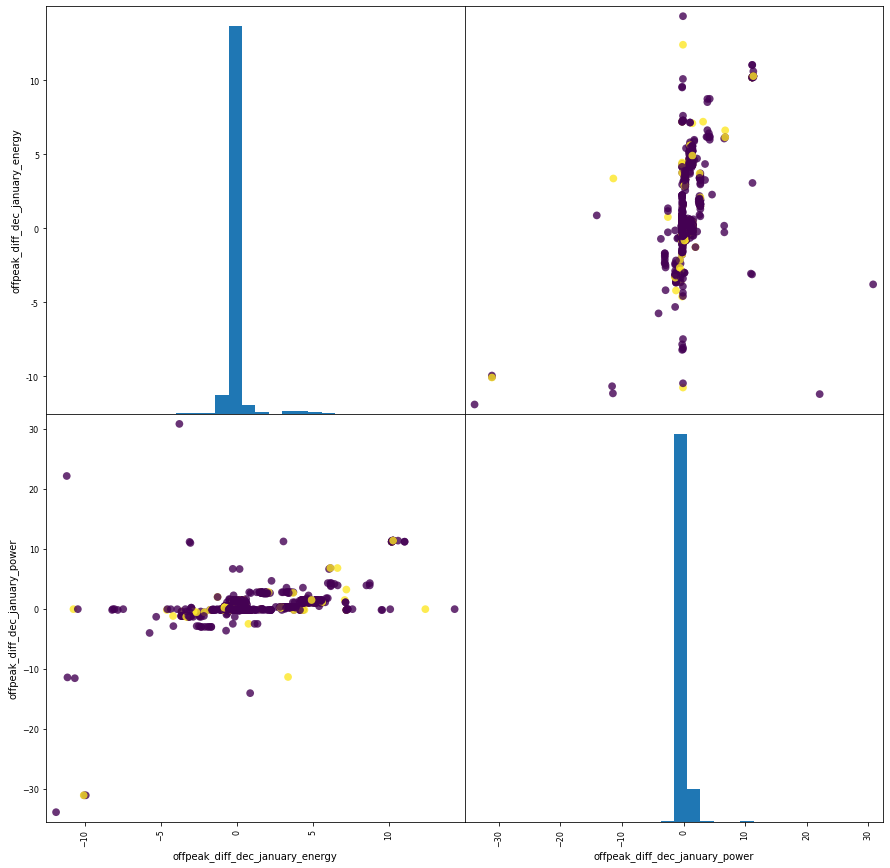

In [31]:
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15),
marker='o', hist_kwds={'bins': 30}, s=60,
alpha=.8)

In [32]:
from sklearn.ensemble import RandomForestClassifier
select = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
select.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
score = select.score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.894


In [35]:
#to compare prediction model's accuracy score using cross-validation
from sklearn.model_selection import cross_val_score

In [36]:
scores_cv= cross_val_score(select,X_train,y_train,cv=10,scoring='accuracy')

In [37]:
scores_cv

array([0.88321168, 0.89963504, 0.88959854, 0.88949772, 0.87671233,
       0.89406393, 0.89315068, 0.89680365, 0.89680365, 0.8913242 ])

In [38]:
#average cv scores
print('Average accuracy score for Random Forest classifier: {:.2f}'.format(scores_cv.mean()))

Average accuracy score for Random Forest classifier: 0.89


In [42]:
#comparing other baseline classification models 
from xgboost import XGBClassifier

In [43]:
xgbc = XGBClassifier() 

In [47]:
xgbc.fit(X_train,y_train)

C:\Users\NAMEERA\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
from sklearn.metrics import classification_report

In [51]:
#classification report for RFC and XGBC
rfe_pred=select.predict(X_test)
print(classification_report(y_test, rfe_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3297
           1       0.08      0.01      0.02       355

    accuracy                           0.89      3652
   macro avg       0.49      0.50      0.48      3652
weighted avg       0.82      0.89      0.85      3652



In [52]:
xgbpred = xgbc.predict(X_test)
print(classification_report(y_test, xgbpred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3297
           1       0.18      0.01      0.01       355

    accuracy                           0.90      3652
   macro avg       0.54      0.50      0.48      3652
weighted avg       0.83      0.90      0.86      3652



In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [61]:
#confusion matrix and scores
#RFC
ypred = rfe_pred
model = select
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[3262   35]
 [ 352    3]]

Accuracy: 0.8940306681270537
Overall Precision: 0.07894736842105263
Overall Recall: 0.008450704225352112
Overall f1-score: 0.015267175572519082


In [62]:
#XGBC
ypred = xgbpred
model = xgbc
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[3288    9]
 [ 353    2]]

Accuracy: 0.9008762322015335
Overall Precision: 0.18181818181818182
Overall Recall: 0.005633802816901409
Overall f1-score: 0.010928961748633882
